# Apply( ), Map( ), & ApplyMap( )

In [31]:
import pandas as pd

In [35]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")

## The Series apply( ) method

In [42]:
def years_to_days(yrs):
    return yrs*365

titanic["age"].apply(years_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [44]:
titanic["age"] * 365

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [45]:
def get_age_group(age):
    if age < 2:
        return "infant"
    elif age < 12:
        return "child"
    elif age < 18:
        return "teen"
    elif age < 50:
        return "adult"
    else:
        return "senior"

In [53]:
titanic["age_group"] = titanic["age"].apply(get_age_group)

In [55]:
titanic.age_group.value_counts()

adult     782
senior    373
child      69
teen       63
infant     22
Name: age_group, dtype: int64

In [57]:
titanic.groupby("age_group").survived.mean()

age_group
adult     0.386189
child     0.492754
infant    0.772727
senior    0.313673
teen      0.476190
Name: survived, dtype: float64

In [59]:
titanic.groupby(["age_group", "sex"]).survived.mean()

age_group  sex   
adult      female    0.748201
           male      0.186508
child      female    0.515152
           male      0.472222
infant     female    0.888889
           male      0.692308
senior     female    0.698276
           male      0.140078
teen       female    0.833333
           male      0.151515
Name: survived, dtype: float64

In [79]:
titanic["fare"] * 24

0       5072.1000
1       3637.2000
2       3637.2000
3       3637.2000
4       3637.2000
          ...    
1304     346.9008
1305     346.9008
1306     173.4000
1307     173.4000
1308     189.0000
Name: fare, Length: 1309, dtype: float64

In [80]:
titanic["fare"].apply(lambda x: f"${x*24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [81]:
def convert_currency(num, multiplier):
    return f"${num*multiplier}"

In [84]:
titanic["fare"].apply(convert_currency, args=(24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

## The DataFrame apply( ) method

In [92]:
df = titanic[["pclass", "survived", "age", "fare"]]

In [93]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [90]:
def get_range(s):
    return s.max() - s.min()

In [94]:
df.apply(get_range)

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [95]:
df.apply(get_range, axis=0)

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [104]:
df.apply(get_range, axis=1)

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [107]:
def get_fam_size(s):
    fam_size = s.sibsp + s.parch
    if fam_size == 0:
        return "solo"
    elif fam_size < 5:
        return "average"
    else:
        return "large"

In [108]:
titanic.apply(get_fam_size, axis=1)

0          solo
1       average
2       average
3       average
4       average
         ...   
1304    average
1305    average
1306       solo
1307       solo
1308       solo
Length: 1309, dtype: object

In [109]:
titanic["fam_size"] = titanic.apply(get_fam_size, axis=1)

In [111]:
titanic["fam_size"].value_counts()

solo       790
average    459
large       60
Name: fam_size, dtype: int64

In [113]:
titanic.groupby("fam_size").survived.mean()

fam_size
average    0.549020
large      0.150000
solo       0.302532
Name: survived, dtype: float64

In [114]:
titanic.groupby(["fam_size", "sex"]).survived.mean()

fam_size  sex   
average   female    0.771429
          male      0.294393
large     female    0.296296
          male      0.030303
solo      female    0.731959
          male      0.162752
Name: survived, dtype: float64

## The map( ) method

In [115]:
titanic["pclass"]

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [116]:
titanic["pclass"].map({1:"1st", 2:"2nd", 3:"3rd"})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [120]:
titanic["age"].map(lambda a: a < 18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

## The applymap( ) method

In [127]:
titanic[["name", "sex", "age_group"]].applymap(str.upper)

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILD
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT


In [139]:
df.applymap(lambda el: el * 7)

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [140]:
df * 7

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [142]:
titanic[["name", "sex", "age_group"]].applymap(len)

,name,sex,age_group
0,29,6,5
1,30,4,6
2,28,6,5
3,36,4,5
4,47,6,5
...,...,...,...
1304,20,6,4
1305,21,6,6
1306,25,4,5
1307,19,4,5


In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")

In [3]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?


In [4]:
def get_age_group(age):
    if age<2:
        return "infant"
    elif age<12:
        return "child"
    elif age<18:
        return "teen"
    elif age<50:
        return "adult"
    else:
        return "senior"
    

    

In [7]:
titanic["age_group"]=titanic.age.apply(get_age_group)

<AxesSubplot:>

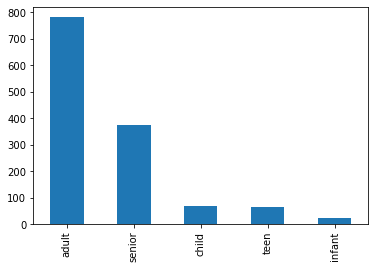

In [10]:
titanic.age_group.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='age_group'>

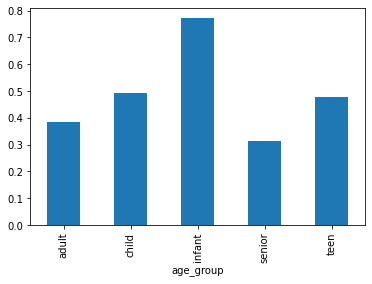

In [17]:
titanic.groupby("age_group")["survived"].mean().plot(kind="bar")

<AxesSubplot:xlabel='sex,age_group'>

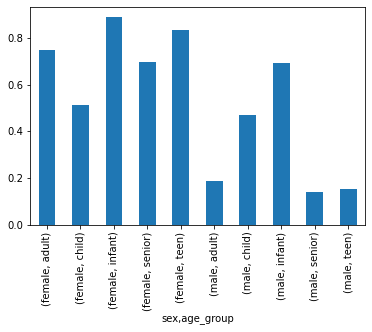

In [18]:
titanic.groupby(["sex","age_group"])["survived"].mean().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

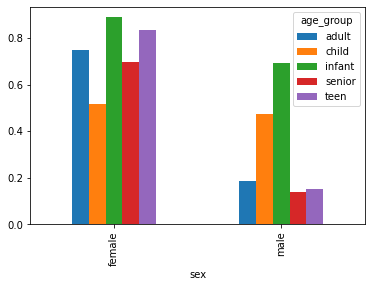

In [22]:
titanic.groupby(["sex","age_group"])["survived"].mean().unstack().plot.bar()

<AxesSubplot:xlabel='age_group'>

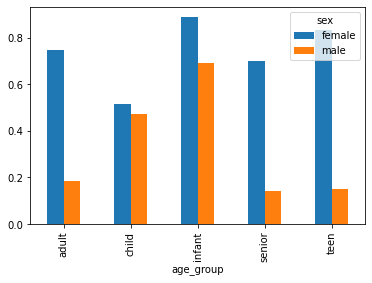

In [24]:
titanic.groupby(["sex","age_group"])["survived"].mean().unstack(0).plot.bar()

In [27]:
titanic.fare.apply(lambda a: f'${a*24}')

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [57]:
def convert_currency(num, multiplier):
#     print("---------")
#     print(num)
    return f"${num*multiplier}"

titanic["fare"].apply(convert_currency, args=(24,))
# for single value for tuple we have to have trailing comma


0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [34]:
type((9,))

tuple

In [63]:
df=titanic[["pclass", "survived","age","fare"]]

In [64]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [65]:
def get_range(s):
#     print("-------")
#     print(s)
    return s.max()-s.min()

In [67]:
df.apply(get_range, axis=0) #if we dont have axis it default to 0 and apply function to every column

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [68]:
df.apply(get_range, axis=1) 

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [78]:
def get_fam_size(s):
    fam_size=s.sibsp + s.parch
    if fam_size==0:
        return "solo"
    elif fam_size<5:
        return "average"
    else:
        return "large"


In [80]:
titanic.apply(get_fam_size, axis=1)

0          solo
1       average
2       average
3       average
4       average
         ...   
1304    average
1305    average
1306       solo
1307       solo
1308       solo
Length: 1309, dtype: object

In [75]:
titanic.sibsp+titanic.parch

0       0
1       3
2       3
3       3
4       3
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Length: 1309, dtype: int64

In [81]:
titanic["fam_size"]=titanic.apply(get_fam_size, axis=1)

<AxesSubplot:>

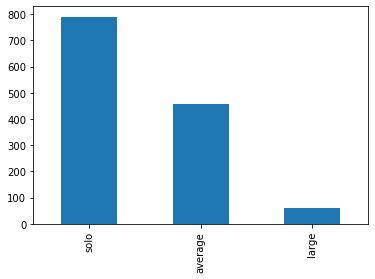

In [84]:
titanic.fam_size.value_counts().plot.bar()

<AxesSubplot:xlabel='fam_size'>

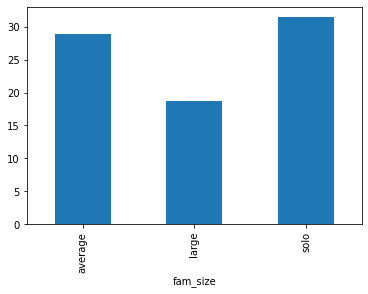

In [88]:
titanic.groupby("fam_size")["age"].mean().plot.bar()

<AxesSubplot:xlabel='fam_size'>

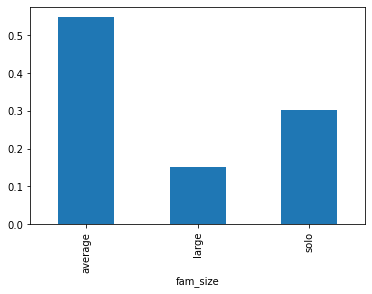

In [92]:
titanic.groupby("fam_size")["survived"].mean().plot.bar()

<AxesSubplot:xlabel='fam_size,sex'>

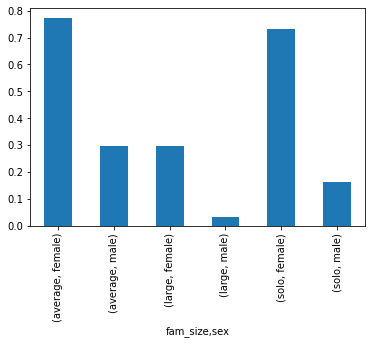

In [93]:
titanic.groupby(["fam_size","sex"])["survived"].mean().plot.bar()

In [96]:
ac=titanic["pclass"]

In [98]:
ac.map({1:"first", 2:"second",3:"third"})

0       first
1       first
2       first
3       first
4       first
        ...  
1304    third
1305    third
1306    third
1307    third
1308    third
Name: pclass, Length: 1309, dtype: object

In [99]:
titanic.age.map(lambda a:a<18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [104]:
titanic[["name","sex","age_group"]]

,name,sex,age_group
0,"Allen, Miss. Elisabeth Walton",female,adult
1,"Allison, Master. Hudson Trevor",male,infant
2,"Allison, Miss. Helen Loraine",female,child
3,"Allison, Mr. Hudson Joshua Creighton",male,adult
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,adult
...,...,...,...
1304,"Zabour, Miss. Hileni",female,teen
1305,"Zabour, Miss. Thamine",female,senior
1306,"Zakarian, Mr. Mapriededer",male,adult
1307,"Zakarian, Mr. Ortin",male,adult


In [103]:
titanic[["name","sex","age_group"]].applymap(str.upper)

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILD
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT


In [105]:
titanic[["name","sex","age_group"]].applymap(len)

,name,sex,age_group
0,29,6,5
1,30,4,6
2,28,6,5
3,36,4,5
4,47,6,5
...,...,...,...
1304,20,6,4
1305,21,6,6
1306,25,4,5
1307,19,4,5


In [106]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [107]:
df.applymap(lambda el:el*7)

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [108]:
df*7

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750
